# Chain-of-Thought Prompting Elicits Reasoning 
# in Large Language Models


<style>
p{
    line-height: 1.5
}
</style>
## Abstract
<p>
We explore how generating a chain of thought—a series of intermediate reasoning
steps—significantly improves the ability of large language models to perform
complex reasoning. In particular, we show how such reasoning abilities emerge
naturally in sufficiently large language models via a simple method called chain-of-thought prompting, where a few chain of thought demonstrations are provided as
exemplars in prompting.
</p>

##### 重点：
* chain of thought: 回答问题的一系列中间推理过程
  
* 有效提高模型的逻辑推理能力

##### 模型优点：
* **常识推理能力赶超人类**：采用思维链提示的大语言模型，在 Bench Hard(BBH) 评测基准的 23 个任务中，有 17 个任务的表现都优于人类基线

* **数学逻辑推理大幅提升**：MultiArith 和 GSM8K 这两个数据集，测试的是语言模型解决数学问题的能力，而通过思维链提示，PaLM 这个大语言模型比传统提示学习的性能提高了 300%！在 MultiArith 和 GSM8K 上的表现提升巨大，甚至超过了有监督学习的最优表现。这意味着，大语言模型也可以解决那些需要精确的、分步骤计算的复杂数学问题了

* **大语言模型更具可解释性，更加可信**：超大规模的无监督深度学习，打造出来的大模型是一个黑盒，推理决策链不可知，这就会让模型结果变得不够可信。而思维链使得模型的推理过程可视化

<style>
p{
    line-height: 2
}
</style>
## 问题 & 解决

### 问题：
大模型并没有在具有挑战性的任务上取得优秀结果，包括：arithmetic, commonsense, and symbolic reasoning（算数、常识、符号推理）

### 解决：
1. **生成逻辑依据 rationale**：   
    <p>
    First, techniques for arithmetic
    reasoning can benefit from generating natural language
    rationales that lead to the final answer.  </p>
    
2. **利用 prompting**：   
    <p>
    Second, large language models offer the exciting
    prospect of in-context few-shot learning via prompting. That is, instead of finetuning a separate
    language model checkpoint for each new task, one can simply “prompt” the model with a few
    input–output exemplars demonstrating the task. Remarkably, this has been successful for a range of
    simple question-answering tasks   </p>
    即：Prompt 是一种为了更好的使用预训练语言模型的知识，采用在输入段添加额外的文本的技术   

### 总结：
上述2种方法都提供了解决方法，但都存在问题：高损耗  
*For rationale-augmented training and finetuning methods, it is costly to create a large set of high quality rationales*    

本文中，通过结合2种方法各自的优点，得到 Chain-of-Thought，该模型取得优秀的测试结果

##### 参考：
关于prompt：https://www.zhihu.com/tardis/zm/art/442486331?source_id=1005

<style>
p{
    line-height: 2
}
</style>
## 实现
### Few Shots 方法：
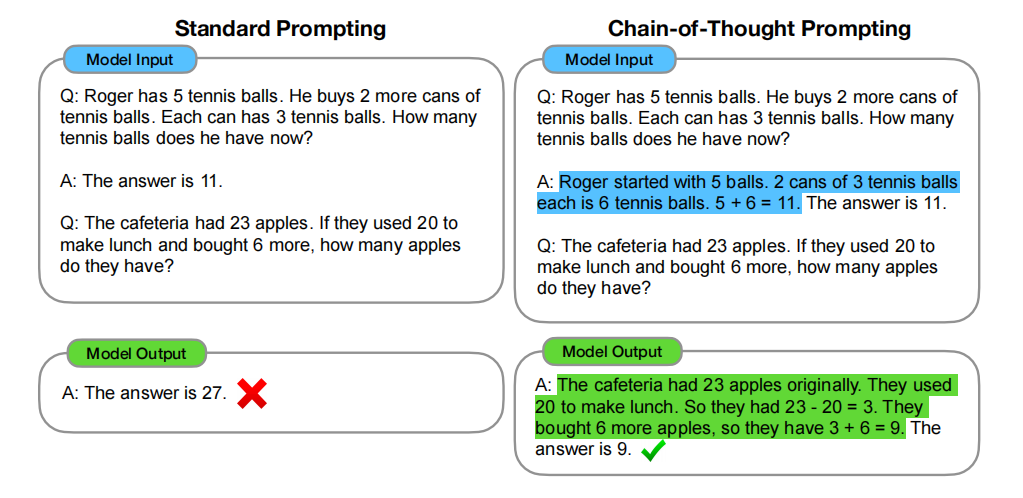  
由图，CoT 在实现上修改了 demonstration 每个 example 的 target，source 保留原样，但 **target 从原来的直接给出答案变为给出中间推理过程，并依据其给出答案**。相应的，模型的 Model Output 也给出了中间推理（可以看到，CoT使该逻辑推理问题的答案准确率提高）



<style>
  color{
    color: LightCoral
  }
</style>
## 实验
### Arithmetic Reasoning（为例）：
 
* Our proposed approach is to augment each exemplar in few-shot prompting with a chain of thought for an associated answer：   
  <color>通过在标本中加入 chain of though，实现 chain of thought prompting

* To investigate whether chain-of-thought prompting in this form can successfully elicit successful reasoning across a range of math word   problems, we used this single set of eight chain of thought exemplars for all benchmarks except AQuA
  <color>通过在一系列benchmarks中测试CoT，得到实验结果
* 测试的案例 图示：   
  
  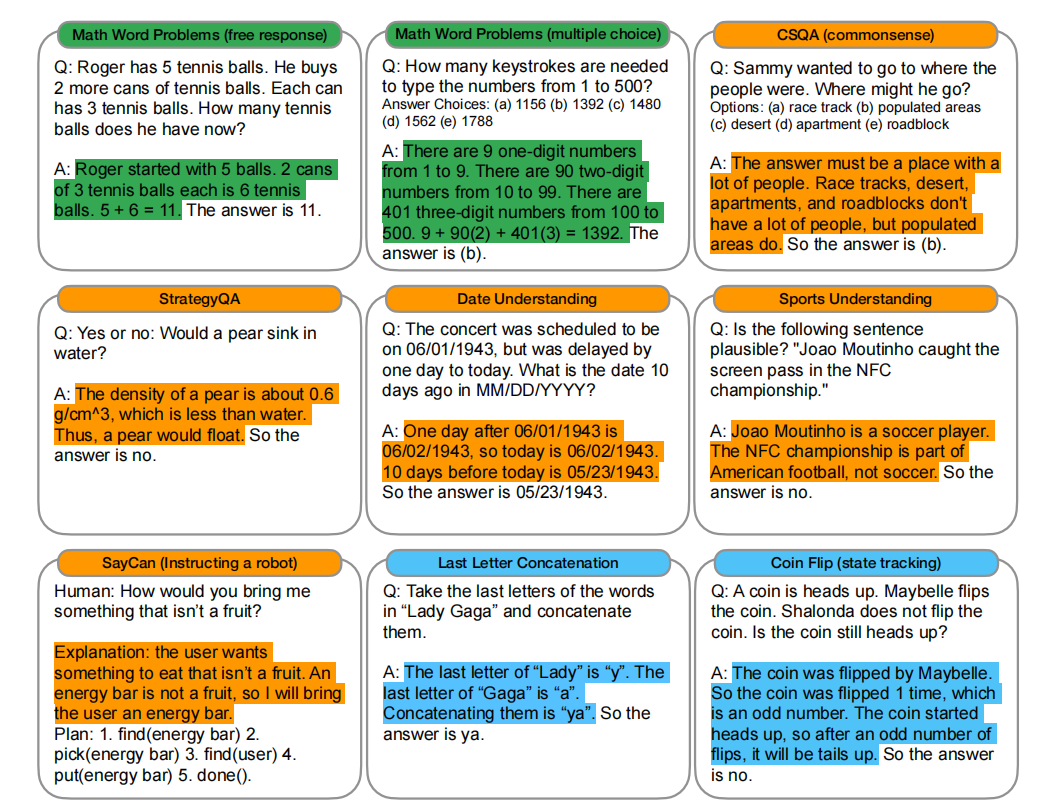  

#### 实验结果：
  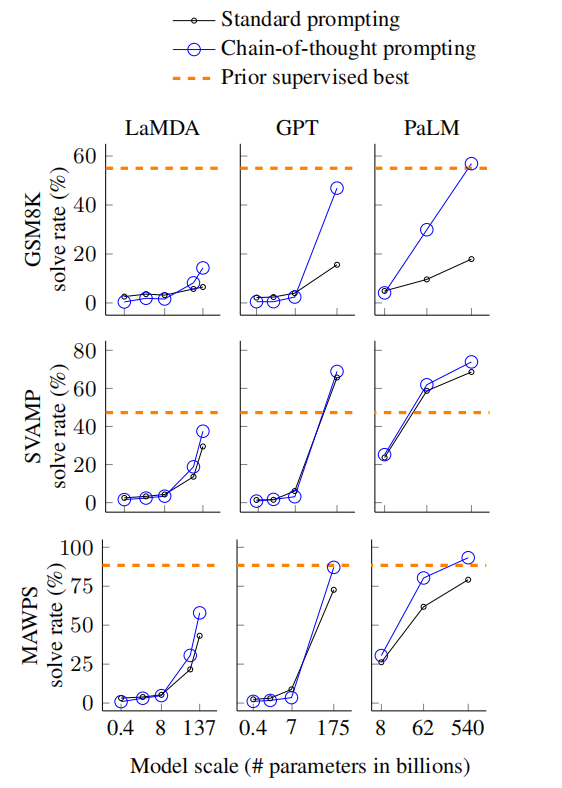        

总结：
1. 对大模型有明显效果，对小模型无积极影响   
    chain-of-thought prompting is an emergent ability of model scale

2. 对复杂问题，往往能带来更大的提升   
   chain-of-thought prompting has larger performance gains for more-complicated problems.

3. 该模型优于现有最高技术水平（即：在标记数据集上进行针对任务的微调）
   chain-of-thought prompting via GPT-3
  175B and PaLM 540B compares favorably to
  prior state of the art, which typically finetunes a
  task-specific model on a labeled training dataset.


### Ablation Study：
#### Equation Only：
    探究提升的原因是不是模型产生了数学等式，故该消融实验在给出答案前，不再提供中间逻辑推理过程，而是给出等式

#### Variable Compute Only：
    探究提升的原因是不是由于更长的句子使得模型在该问题上提供了更大的计算量，故该消融实验用dot代替

#### Chain of Thought after Answer：
    探究提升的原因是不是prompts在预训练时提供了更多的有效信息，故该消融实验将逻辑推理部分放到结果后   

#### 消融实验结果：
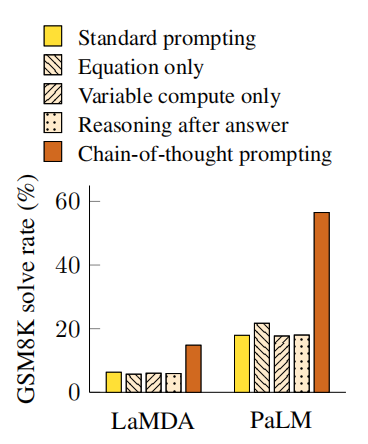

## 后续
### Zero-Shot
**通过在问题的结尾附加“Let's think step by step”这几个词，大语言模型能够生成一个回答问题的思维链**    

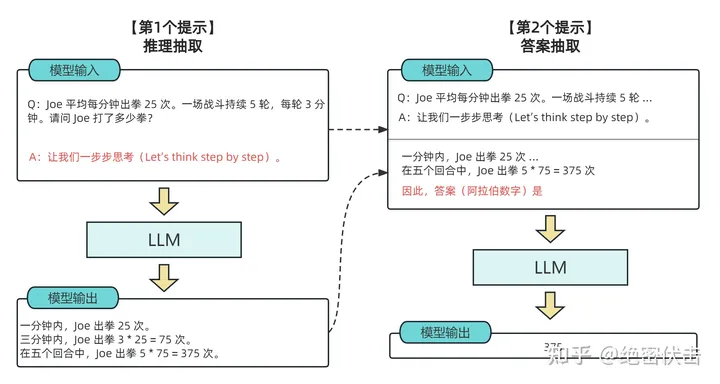

#### 附加语句的正确性
作者还做了解释，说明这句“Let's think step by step”是经过验证的，比如对比下面的其它的 instruction，尤其那些不相关的和误导的，效果就非常差，说明大模型真的是在理解这句 instruction 的意思。      

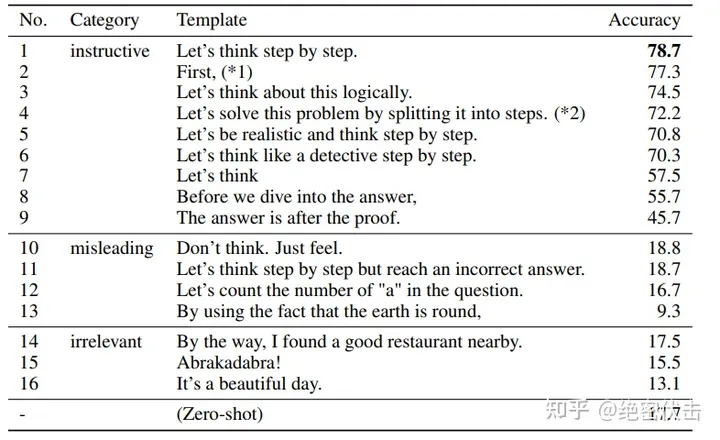